<a id="top"></a>
# Tutorial Title

***

## Learning Goals
Write three to five learning goals. A learning goal should describe what a reader should know or be able to do by the end of the tutorial that they didn't know or couldn't do before.

```
By the end of this tutorial, you will:

- Access data from the Hubble Source Catalog (HSC) and zMAST using astroquery
- Learn how to search for time-variable objects
- Make cutout images in an album style for visual classification.

```

## Introduction
Write a short introduction explaining the purpose of the tutorial. Define any terms or common acronyms that your audience may not know. If you're using some kind of domain-specific astronomical symbol or unusual mathematical concept, make sure you define it (for example, in its mathematical form) and link to any definitions (from literature, Wikipedia, etc.).
The sky is full of transient phenomena - supernovae, variable stars or active galactic nuclei (AGN), tidal disruption events (TDEs).
Of course, looking at every patch of the sky continuously, in the hopes of finding these relatively rare events, is humanly unfeasible. Instead, we can narrow down our regions of interest using pre-existing, or archival, data.
The <a href='https://catalogs.mast.stsci.edu/hsc/'>Hubble Source Catalog</a> 
and <a href='https://z.mast.stsci.edu/'>zMAST</a>
are two rich examples of such databases.
Spend some time on these archives to get a sense for what's available in each of them. Why do you think you might want to use both when looking for transient candidates?
<b>Define an exploration task here.</b>

The interactive websites are a great way to get familiar with the data products. Once you know exactly what numbers/images you want for your analyses, however, a much more efficient way to access these is <a href='https://astroquery.readthedocs.io/en/latest/mast/mast.html'>AstroQuery</a>. This allows you to pull all the fields you like into a single object in Python, that you can manipulate as you go.

## Imports
This tutorial will use the following Python libraries:
- *numpy* to handle array functions
- *astropy.io fits* for accessing FITS files
- *astropy.table Table* for creating tidy tables of the data
- *matplotlib.pyplot* for plotting data
- *astroquery.mast* to pull data from HSC and zMAST.

In [30]:
%matplotlib inline
import numpy as np
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
from astroquery.mast import Mast, Observations, Catalogs, Zcut
from astropy.coordinates import SkyCoord
from astropy import units as u

***

## Main Content

The main content of your tutorial should be subdivided into numbered sections with useful, descriptive headings that make sense based on the content. Break sections up with standard Markdown syntax headings:

```
## Section 1

Intro to Section 1

### Subsection 1a

More detailed info about Section 1

## Section 2

A complete thought that's as important as Section 1 but doesn't need subsections.

```

### Loading Data

Loading data and file information should appear within your main content, at the same time the data is going to be used, if possible. These elements of your tutorial can be their own sections within the main content, but avoid generic or vague headings like “Loading Data” and instead use descriptive headings pertinent to the content of the tutorial and the actual data being downloaded or files being used.

If the user needs to download data to run the tutorial properly, where possible, use [Astroquery](https://astroquery.readthedocs.io/en/latest/) (or similar) to retrieve files. If this is not possible, see the [data guide](https://github.com/spacetelescope/style-guides/blob/master/guides/where-to-put-your-data.md) for other options.

First, we want to pull all the observations from the Hubble Source Catalog using astroquery. This is done using the Catalogs module, which readily sorts the many inhomogeneous Hubble observations into specific, neat catalogs like HSC. We will use the query_region function, which needs an (RA, DEC) position for reference. Additionally, it needs a search radius around this coordinate, with the default being 0.2 degrees (12 arcminutes). What should this radius be if we want to pull data from the entire sky?

In [20]:
#radius is distance in degrees from specified coords
# r_max = 180
#we want NumVisits > 1
obs_table = Catalogs.query_region("158.47924 -7.30962", catalog='HSC', radius=50)

In [21]:
obs_table

MatchID,Distance,MatchRA,MatchDec,DSigma,AbsCorr,NumFilters,NumVisits,NumImages,StartTime,StopTime,StartMJD,StopMJD,TargetName,CI,CI_Sigma,KronRadius,KronRadius_Sigma,Extinction,SpectrumFlag,W2_F170W,W2_F170W_MAD,W2_F170W_N,W2_F255W,W2_F255W_MAD,W2_F255W_N,W2_F300W,W2_F300W_MAD,W2_F300W_N,W2_F336W,W2_F336W_MAD,W2_F336W_N,W2_F380W,W2_F380W_MAD,W2_F380W_N,A_F435W,A_F435W_MAD,A_F435W_N,W2_F439W,W2_F439W_MAD,W2_F439W_N,A_F475W,A_F475W_MAD,A_F475W_N,W2_F547M,W2_F547M_MAD,W2_F547M_N,W2_F555W,W2_F555W_MAD,W2_F555W_N,W3_F600LP,W3_F600LP_MAD,W3_F600LP_N,A_F606W,A_F606W_MAD,A_F606W_N,W2_F606W,W2_F606W_MAD,W2_F606W_N,W3_F606W,W3_F606W_MAD,W3_F606W_N,A_F625W,A_F625W_MAD,A_F625W_N,W3_F625W,W3_F625W_MAD,W3_F625W_N,W2_F656N,W2_F656N_MAD,W2_F656N_N,W2_F675W,W2_F675W_MAD,W2_F675W_N,W2_F702W,W2_F702W_MAD,W2_F702W_N,A_F775W,A_F775W_MAD,A_F775W_N,A_F814W,A_F814W_MAD,A_F814W_N,W2_F814W,W2_F814W_MAD,W2_F814W_N,W3_F814W,W3_F814W_MAD,W3_F814W_N,A_F850LP,A_F850LP_MAD,A_F850LP_N,W3_F098M,W3_F098M_MAD,W3_F098M_N,W3_F105W,W3_F105W_MAD,W3_F105W_N,W3_F110W,W3_F110W_MAD,W3_F110W_N,W3_F125W,W3_F125W_MAD,W3_F125W_N,W3_F127M,W3_F127M_MAD,W3_F127M_N,W3_F139M,W3_F139M_MAD,W3_F139M_N,W3_F153M,W3_F153M_MAD,W3_F153M_N,W3_F160W,W3_F160W_MAD,W3_F160W_N
str9,float64,float64,float64,float64,str1,int64,int64,int64,str21,str21,float64,float64,str27,float64,float64,float64,float64,float64,str1,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64
28900467,135.2845195764324,157.49939488180465,-5.2758895916828665,0.0,Y,1,1,1,/Date(1321573264273)/,/Date(1321574630273)/,55882.98685499327,55883.00266515976,GRB110312A,2.1069318056106567,0.0,0.2963999807834625,0.0,0.038844410330057144,N,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,25.763399124145508,0.0,1,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0
55810504,135.33887703211872,157.48389519740252,-5.282327616259147,0.0,Y,1,1,1,/Date(1321573264273)/,/Date(1321574630273)/,55882.98685499327,55883.00266515976,GRB110312A,0.9477272629737854,0.0,0.15359999239444733,0.0,0.038844410330057144,N,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,24.49519920349121,0.0,1,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0
55229628,135.3419659955615,157.48748991407615,-5.280531553939175,0.0,Y,1,1,1,/Date(1321573264273)/,/Date(1321574630273)/,55882.98685499327,55883.00266515976,GRB110312A,1.005454564636404,0.0,0.14000000059604645,0.0,0.038844410330057144,N,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,19.358200073242188,0.0,1,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0
51107882,135.34704662329085,157.49136720475988,-5.278570747415754,0.0,Y,1,1,1,/Date(1321573264273)/,/Date(1321574630273)/,55882.98685499327,55883.00266515976,GRB110312A,0.6124999712813984,0.0,0.1563999950885

Text(0.5, 1.0, 'Field 2')

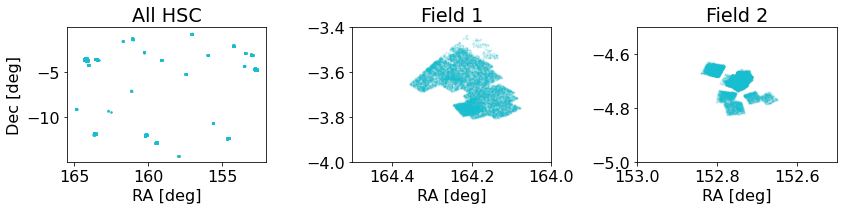

In [73]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(ncols=3, figsize=(12,3))
ax[0].plot(obs_table['MatchRA'], obs_table['MatchDec'], 'bo', markersize=1, alpha=0.1, color='tab:cyan')
ax[1].plot(obs_table['MatchRA'], obs_table['MatchDec'], 'bo', markersize=1, alpha=0.1, color='tab:cyan')
ax[2].plot(obs_table['MatchRA'], obs_table['MatchDec'], 'bo', markersize=1, alpha=0.1, color='tab:cyan')
ax[1].set_xlim(164,164.5); ax[1].set_ylim(-4,-3.4)
ax[2].set_xlim(152.5,153); ax[2].set_ylim(-5,-4.5)
for a in ax.flatten(): 
    a.invert_xaxis()
    a.set_xlabel('RA [deg]')
ax[0].set_ylabel('Dec [deg]')
plt.tight_layout()
ax[0].set_title('All HSC')
ax[1].set_title('Field 1')
ax[2].set_title('Field 2')
# plt.xlim(163,165); plt.ylim(-5,-3)

The coverage is sparse when you look across the entire sky; the HST field of view is 0.003$^{\circ^2}$ even for the widest camers. However, it had several dedicated surveys that scanned small patches with exquisite spatial resolution. You will find thousands, if not millions, of sources in each of these fields. 

Now, let us select objects with more than two observations, since we need that to figure out if they are changing over time. Let's save this catalog, since, as you certainly noticed, pulling the entire catalog takes time. 

In [27]:
repeats = obs_table[obs_table['NumVisits'] > 2]
repeats.write('hsc_repeats.dat', format='ascii')

Next, we want to cross-match these objects with zMAST. This stores images and other data products for the surveys:     CANDELS, GOODS, HFF-DEEPSPACE and 3D-HST.

In [33]:
coords = SkyCoord(ra=repeats['MatchRA'], dec=repeats['MatchDec'], unit = (u.deg, u.deg))
coords

<SkyCoord (ICRS): (ra, dec) in deg
    [(155.63851262, -10.62082238), (155.63486561, -10.62343148),
     (155.64047814, -10.62943255), ..., (164.31209622,  -3.58218178),
     (164.30790962,  -3.57556317), (164.31544727,  -3.58655999)]>

In [74]:
Catalogs.query_region?

In [70]:
#size in pixels
i=0
cross = []
for coord in coords[:1000]:
    hdulist = Zcut.get_surveys(coordinates=coord)
    print(i, coord)
    if len(hdulist):

        cross.append(coord)
    i+=1

0 <SkyCoord (ICRS): (ra, dec) in deg
    (155.63851262, -10.62082238)>
1 <SkyCoord (ICRS): (ra, dec) in deg
    (155.63486561, -10.62343148)>
2 <SkyCoord (ICRS): (ra, dec) in deg
    (155.64047814, -10.62943255)>
3 <SkyCoord (ICRS): (ra, dec) in deg
    (155.63673826, -10.62897515)>
4 <SkyCoord (ICRS): (ra, dec) in deg
    (155.62834751, -10.62243788)>
5 <SkyCoord (ICRS): (ra, dec) in deg
    (155.62875614, -10.62477106)>
6 <SkyCoord (ICRS): (ra, dec) in deg
    (155.63801403, -10.63313472)>
7 <SkyCoord (ICRS): (ra, dec) in deg
    (155.63734953, -10.63447649)>
8 <SkyCoord (ICRS): (ra, dec) in deg
    (155.63379123, -10.63695166)>
9 <SkyCoord (ICRS): (ra, dec) in deg
    (155.6346468, -10.63774939)>
10 <SkyCoord (ICRS): (ra, dec) in deg
    (160.16007021, -11.9194846)>
11 <SkyCoord (ICRS): (ra, dec) in deg
    (159.44173771, -12.7008163)>
12 <SkyCoord (ICRS): (ra, dec) in deg
    (159.45460134, -12.70049985)>
13 <SkyCoord (ICRS): (ra, dec) in deg
    (159.44126648, -12.70306125)>
14 <S

115 <SkyCoord (ICRS): (ra, dec) in deg
    (159.45003605, -12.71115215)>
116 <SkyCoord (ICRS): (ra, dec) in deg
    (159.45407425, -12.71052155)>
117 <SkyCoord (ICRS): (ra, dec) in deg
    (159.46219637, -12.70923315)>
118 <SkyCoord (ICRS): (ra, dec) in deg
    (159.47636164, -12.70694693)>
119 <SkyCoord (ICRS): (ra, dec) in deg
    (159.48128436, -12.70609763)>
120 <SkyCoord (ICRS): (ra, dec) in deg
    (159.43773428, -12.71377696)>
121 <SkyCoord (ICRS): (ra, dec) in deg
    (159.46885229, -12.70845376)>
122 <SkyCoord (ICRS): (ra, dec) in deg
    (159.46035353, -12.71011437)>
123 <SkyCoord (ICRS): (ra, dec) in deg
    (159.47553682, -12.70756065)>
124 <SkyCoord (ICRS): (ra, dec) in deg
    (159.48633996, -12.70562193)>
125 <SkyCoord (ICRS): (ra, dec) in deg
    (159.47790362, -12.70730964)>
126 <SkyCoord (ICRS): (ra, dec) in deg
    (159.46293023, -12.71002059)>
127 <SkyCoord (ICRS): (ra, dec) in deg
    (159.45477067, -12.71148584)>
128 <SkyCoord (ICRS): (ra, dec) in deg
    (159.437

228 <SkyCoord (ICRS): (ra, dec) in deg
    (159.47673958, -12.71453251)>
229 <SkyCoord (ICRS): (ra, dec) in deg
    (159.47165538, -12.71548391)>
230 <SkyCoord (ICRS): (ra, dec) in deg
    (159.44036067, -12.72104171)>
231 <SkyCoord (ICRS): (ra, dec) in deg
    (159.46623496, -12.71654611)>
232 <SkyCoord (ICRS): (ra, dec) in deg
    (159.48908732, -12.7126272)>
233 <SkyCoord (ICRS): (ra, dec) in deg
    (159.49160235, -12.71222708)>
234 <SkyCoord (ICRS): (ra, dec) in deg
    (159.43603371, -12.72213574)>
235 <SkyCoord (ICRS): (ra, dec) in deg
    (159.45519705, -12.7188429)>
236 <SkyCoord (ICRS): (ra, dec) in deg
    (159.44892318, -12.72005202)>
237 <SkyCoord (ICRS): (ra, dec) in deg
    (159.4360688, -12.72227301)>
238 <SkyCoord (ICRS): (ra, dec) in deg
    (159.45893391, -12.71834339)>
239 <SkyCoord (ICRS): (ra, dec) in deg
    (159.48805042, -12.71334899)>
240 <SkyCoord (ICRS): (ra, dec) in deg
    (159.47985157, -12.71484414)>
241 <SkyCoord (ICRS): (ra, dec) in deg
    (159.493089

341 <SkyCoord (ICRS): (ra, dec) in deg
    (159.45662947, -12.7259742)>
342 <SkyCoord (ICRS): (ra, dec) in deg
    (159.49390245, -12.7194011)>
343 <SkyCoord (ICRS): (ra, dec) in deg
    (159.46034522, -12.72574422)>
344 <SkyCoord (ICRS): (ra, dec) in deg
    (159.46236461, -12.72567821)>
345 <SkyCoord (ICRS): (ra, dec) in deg
    (159.46883864, -12.72456296)>
346 <SkyCoord (ICRS): (ra, dec) in deg
    (159.44820071, -12.72822181)>
347 <SkyCoord (ICRS): (ra, dec) in deg
    (159.45899087, -12.72634307)>
348 <SkyCoord (ICRS): (ra, dec) in deg
    (159.4587312, -12.72650961)>
349 <SkyCoord (ICRS): (ra, dec) in deg
    (159.4822645, -12.72250013)>
350 <SkyCoord (ICRS): (ra, dec) in deg
    (159.44183344, -12.72992514)>
351 <SkyCoord (ICRS): (ra, dec) in deg
    (159.4906509, -12.72135868)>
352 <SkyCoord (ICRS): (ra, dec) in deg
    (159.46932165, -12.72521533)>
353 <SkyCoord (ICRS): (ra, dec) in deg
    (159.45483951, -12.72794007)>
354 <SkyCoord (ICRS): (ra, dec) in deg
    (159.48992415

454 <SkyCoord (ICRS): (ra, dec) in deg
    (159.45467819, -12.73579708)>
455 <SkyCoord (ICRS): (ra, dec) in deg
    (159.45647577, -12.73550423)>
456 <SkyCoord (ICRS): (ra, dec) in deg
    (159.44913193, -12.73692935)>
457 <SkyCoord (ICRS): (ra, dec) in deg
    (159.47267871, -12.73287306)>
458 <SkyCoord (ICRS): (ra, dec) in deg
    (159.45476372, -12.7361255)>
459 <SkyCoord (ICRS): (ra, dec) in deg
    (159.45582956, -12.7359558)>
460 <SkyCoord (ICRS): (ra, dec) in deg
    (159.45620316, -12.73598054)>
461 <SkyCoord (ICRS): (ra, dec) in deg
    (159.49233822, -12.72956248)>
462 <SkyCoord (ICRS): (ra, dec) in deg
    (159.44268746, -12.73849222)>
463 <SkyCoord (ICRS): (ra, dec) in deg
    (159.49411237, -12.72943572)>
464 <SkyCoord (ICRS): (ra, dec) in deg
    (159.49248159, -12.72974063)>
465 <SkyCoord (ICRS): (ra, dec) in deg
    (159.47268461, -12.73332656)>
466 <SkyCoord (ICRS): (ra, dec) in deg
    (159.44077749, -12.73896776)>
467 <SkyCoord (ICRS): (ra, dec) in deg
    (159.45159

567 <SkyCoord (ICRS): (ra, dec) in deg
    (159.47214414, -12.7404782)>
568 <SkyCoord (ICRS): (ra, dec) in deg
    (159.43756201, -12.74657135)>
569 <SkyCoord (ICRS): (ra, dec) in deg
    (159.44153938, -12.74590658)>
570 <SkyCoord (ICRS): (ra, dec) in deg
    (159.45859226, -12.74306514)>
571 <SkyCoord (ICRS): (ra, dec) in deg
    (159.48849025, -12.73793205)>
572 <SkyCoord (ICRS): (ra, dec) in deg
    (159.4872116, -12.73828025)>
573 <SkyCoord (ICRS): (ra, dec) in deg
    (159.43487018, -12.74749812)>
574 <SkyCoord (ICRS): (ra, dec) in deg
    (159.48290644, -12.73915015)>
575 <SkyCoord (ICRS): (ra, dec) in deg
    (159.45845854, -12.74380764)>
576 <SkyCoord (ICRS): (ra, dec) in deg
    (159.45342044, -12.74471335)>
577 <SkyCoord (ICRS): (ra, dec) in deg
    (159.46287845, -12.74306348)>
578 <SkyCoord (ICRS): (ra, dec) in deg
    (159.48597253, -12.73903016)>
579 <SkyCoord (ICRS): (ra, dec) in deg
    (159.48452062, -12.7393106)>
580 <SkyCoord (ICRS): (ra, dec) in deg
    (159.471115

680 <SkyCoord (ICRS): (ra, dec) in deg
    (159.43813536, -12.75513671)>
681 <SkyCoord (ICRS): (ra, dec) in deg
    (159.49001924, -12.7461578)>
682 <SkyCoord (ICRS): (ra, dec) in deg
    (159.46280988, -12.75106837)>
683 <SkyCoord (ICRS): (ra, dec) in deg
    (159.44326387, -12.75464812)>
684 <SkyCoord (ICRS): (ra, dec) in deg
    (159.48887138, -12.74668535)>
685 <SkyCoord (ICRS): (ra, dec) in deg
    (159.47329261, -12.74964895)>
686 <SkyCoord (ICRS): (ra, dec) in deg
    (159.45741627, -12.75244218)>
687 <SkyCoord (ICRS): (ra, dec) in deg
    (159.4365825, -12.75603299)>
688 <SkyCoord (ICRS): (ra, dec) in deg
    (159.44434629, -12.75476599)>
689 <SkyCoord (ICRS): (ra, dec) in deg
    (159.48995463, -12.74680493)>
690 <SkyCoord (ICRS): (ra, dec) in deg
    (159.45881707, -12.75235367)>
691 <SkyCoord (ICRS): (ra, dec) in deg
    (159.4707505, -12.75035587)>
692 <SkyCoord (ICRS): (ra, dec) in deg
    (159.44030088, -12.75585176)>
693 <SkyCoord (ICRS): (ra, dec) in deg
    (159.449044

794 <SkyCoord (ICRS): (ra, dec) in deg
    (152.78959074, -4.7776297)>
795 <SkyCoord (ICRS): (ra, dec) in deg
    (152.79144947, -4.77353179)>
796 <SkyCoord (ICRS): (ra, dec) in deg
    (152.79495443, -4.76569823)>
797 <SkyCoord (ICRS): (ra, dec) in deg
    (152.77078161, -4.81866993)>
798 <SkyCoord (ICRS): (ra, dec) in deg
    (152.79276893, -4.76987801)>
799 <SkyCoord (ICRS): (ra, dec) in deg
    (152.79393092, -4.76711659)>
800 <SkyCoord (ICRS): (ra, dec) in deg
    (152.7893446, -4.7770341)>
801 <SkyCoord (ICRS): (ra, dec) in deg
    (152.78943832, -4.77606377)>
802 <SkyCoord (ICRS): (ra, dec) in deg
    (152.78994673, -4.77485923)>
803 <SkyCoord (ICRS): (ra, dec) in deg
    (152.7911319, -4.771906)>
804 <SkyCoord (ICRS): (ra, dec) in deg
    (152.77067298, -4.81564121)>
805 <SkyCoord (ICRS): (ra, dec) in deg
    (152.77297035, -4.81038819)>
806 <SkyCoord (ICRS): (ra, dec) in deg
    (152.77121637, -4.81310324)>
807 <SkyCoord (ICRS): (ra, dec) in deg
    (152.79272255, -4.76552712)

910 <SkyCoord (ICRS): (ra, dec) in deg
    (152.83153828, -4.66553137)>
911 <SkyCoord (ICRS): (ra, dec) in deg
    (152.83089472, -4.66674107)>
912 <SkyCoord (ICRS): (ra, dec) in deg
    (152.76899622, -4.80023779)>
913 <SkyCoord (ICRS): (ra, dec) in deg
    (152.76957265, -4.79876536)>
914 <SkyCoord (ICRS): (ra, dec) in deg
    (152.77673138, -4.78269707)>
915 <SkyCoord (ICRS): (ra, dec) in deg
    (152.7777299, -4.78036551)>
916 <SkyCoord (ICRS): (ra, dec) in deg
    (152.77903696, -4.77748461)>
917 <SkyCoord (ICRS): (ra, dec) in deg
    (152.76659319, -4.80496309)>
918 <SkyCoord (ICRS): (ra, dec) in deg
    (152.77048896, -4.79570881)>
919 <SkyCoord (ICRS): (ra, dec) in deg
    (152.78849843, -4.75606767)>
920 <SkyCoord (ICRS): (ra, dec) in deg
    (152.77795263, -4.77917521)>
921 <SkyCoord (ICRS): (ra, dec) in deg
    (152.77841587, -4.778147)>
922 <SkyCoord (ICRS): (ra, dec) in deg
    (152.76494078, -4.80802152)>
923 <SkyCoord (ICRS): (ra, dec) in deg
    (152.78138762, -4.771490

In [71]:
cross #why??

[]

### File Information

Explain pertinent details about the file you've just downloaded. For example, if working with Kepler light curves, explain what's in the different file extensions:

```
- No. 0 (Primary): This HDU contains metadata related to the entire file.
- No. 1 (Light curve): This HDU contains a binary table that holds data like
  flux measurements and times. We will extract information from here when we
  define the parameters for the light curve plot.
- No. 2 (Aperture): This HDU contains the image extension with data collected
  from the aperture. We will also use this to display a bitmask plot that
  visually represents the optimal aperture used to create the SAP_FLUX column in
  HDU1.

```

## Exercises
Exercises are optional, but encouraged. Exercises can be woven into the main content of your tutorial, or appear in their own section toward the end of the tutorial. Final exercises can be more challenging, similar to homework problems. They can be minimal or take as long as 30 minutes to an hour to complete. If you do have one or more exercises in your tutorial, be sure to leave a blank code cell underneath each to show the reader that they're meant to try out their new skill right there. You may also want to include a "solutions" notebook next to your main notebook for the reader to check their work after they have finished their attempt.

## Additional Resources

This section is optional. Try to weave resource links into the main content of your tutorial so that they are falling in line with the context of your writing. For resources that do not fit cleanly into your narrative, you may include an additional resources section at the end of your tutorial. Usually a list of links using Markdown bullet list plus link format is appropriate:

- [MAST API](https://mast.stsci.edu/api/v0/index.html)
- [The Hubble Catalog of Variables](https://arxiv.org/pdf/1909.10757.pdf)

## About this Notebook
Let the world know who the author of this great tutorial is! If possible and appropriate, include a contact email address for users who might need support (for example, `archive@stsci.edu`). You can also optionally include keywords, your funding source, or a last update date in this section.

**Author:** Jessie Blogs, Archive Scientist.  
**Updated On:** YYYY-MM-DD

## Citations
Provide your reader with guidelines on how to cite open source software and other resources in their own published work.

```
If you use `astropy` or `lightkurve` for published research, please cite the
authors. Follow these links for more information about citing `astropy` and
`lightkurve`:

* [Citing `astropy`](https://www.astropy.org/acknowledging.html)
* [Citing `lightkurve`](http://docs.lightkurve.org/about/citing.html)

```

***

[Top of Page](#top)
<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/> 